<a href="https://colab.research.google.com/github/DavoodSZ1993/RL/blob/main/07_Qlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gym
%matplotlib inline

env = gym.make('FrozenLake-v0')

env.action_space, env.observation_space, env.reset()

(Discrete(4), Discrete(16), 0)

In [3]:
q = np.ones((16,4))

nb_episodes = 500000
STEPS = 5000
alpha = 0.001
gamma = 1.
epsilon = 0.05

q_performance = np.ndarray(nb_episodes//STEPS)

# Q-Learning:
Q-learning is a value-based off-policy temporal difference (TD) reinforcement learning. 

* Off-policy means an agent follows a behaviour plocy for choosing the action to reach the next state $s_{t+1}$ from state $s_t$. From state $s_{t+1}$, it uses a policy $\pi$ that is different from behaviour policy. In Q-learning, we take absolute greedy action as policy $π$ from the next state $s_{t+1}$ [1].

$$
Q(s,a) = r(s,a) + \gamma . max_{a} Q(s\prime,a)
$$


## References:
[1]. [Q-Learning: A Value-based Reinforcement Learning Algorithm](https://medium.com/intro-to-artificial-intelligence/q-learning-a-value-based-reinforcement-learning-algorithm-272706d835cf)

In [6]:
def action_epsilon_greedy(q, s, epsilon=0.05):
  if np.random.rand() > epsilon:
    return np.argmax(q[s])
  return np.random.randint(4)

def greedy_policy(q, s):
  return np.argmax(q[s])

def average_performance(policy_fct, q):
  acc_returns = 0.
  n = 500
  
  for i in range(n):
    done = False
    s = env.reset()
    while not done:
      a = policy_fct(q, s)
      s, reward, done, _ = env.step(a)
      acc_returns += reward

  return acc_returns/n

In [7]:
# Q-learning: Off-policy TD control algorithm
for i in range(nb_episodes):
  done = False
  s = env.reset()

  while not done:
    a = action_epsilon_greedy(q, s) # behaviour policy
    new_s, reward, done, _ = env.step(a)
    a_max = np.argmax(q[new_s])  # estimation policy
    q[s, a] = q[s, a] + alpha *(reward + gamma * q[new_s, a_max] - q[s, a])
    s = new_s


  if i%STEPS ==0:
    q_performance[i//STEPS] = average_performance(greedy_policy, q)

Text(0.5, 1.0, 'Learning progress for Q-learning')

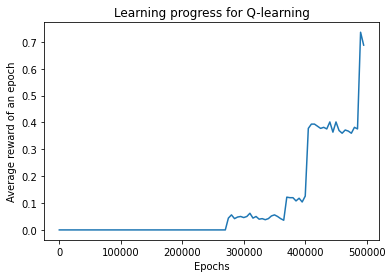

In [8]:
plt.plot(STEPS * np.arange(nb_episodes//STEPS), q_performance)
plt.xlabel("Epochs")
plt.ylabel("Average reward of an epoch")
plt.title("Learning progress for Q-learning")

In [10]:
average_performance(greedy_policy, q)

0.692